# **Análisis y Visualización de Datos**

## **Actividades**

#### **Análisis descriptivo**

* Transformar cada campo de acuerdo con su tipo de variable (entero, fecha, string, etc).

* Visualizar la distribución de datos de cada campo utilizando gráficos que consideren adecuados. 

#### **Análisis estadístico**

* Caracterizar a los pacientes de la institución en términos de edad, sexo y prestador. Para el caso de la edad, determinar si los datos siguen alguna alguna distribución conocida. Para el sexo, determinar si hay una diferencia significativa entre hombres y mujeres.

* Determinar la cantidad de turnos asignados por pacientes, y la cantidad de ausencias.

* **Observación:** El campo "Paciente" corresponde al nombre y apellido del paciente, por lo que no contamos con una identificación unívoca de cada persona, dado que los nombres se pueden repetir. ¿Es esto realmente un problema? ¿Se puede resolver?

* Elegir (al menos) tres variables, las cuales crean que pueden estar correlacionadas con la tasa de ausentismo. Para cada una de ellas calcular la probabilidad de que un turno esté ausente, condicionada a esa variable. 

* En el ámbito de la medicina es común ver que se utilizan descriptores estadísticos particulares. Uno de ellos es el Odds Ratio, el cual mide las chances de que los valores de dos variables sean observados en conjunto [1]. Para cada variable, calcular los Odds Ratio (OR) con respecto a la variable objetivo (austentismo), y determinar su intervalo de confianza utilizando el método que consideren adecuado.

* Comparar los resultdos de los dos puntos anteriores. Si existen diferencias, discutir cuáles son y a qué se deben.

#### **Cantidad de turnos en el tiempo:**

* ¿Cuáles son los horarios más demandados? ¿Existe una hora pico?

* ¿Qué días de la semana se dan más turnos? ¿Qué días presentan mayor ausentismo?

* ¿Cómo evoluciona la cantidad de turnos y la cantidad de ausencias a lo largo del año? ¿Existe alguna tendencia?

#### **Opcional**

* Realizar un gráfico Ranking-Frecuencia [2] para la cantidad de turnos por paciente. ¿Se cumple la ley de Zipf? Realizar el mismo análisis, pero separando turnos atendidos y turnos ausentes.

## **Entrega**

**Formato de entrega:** Deberán entregar el análisis realizado, junto con los códigos con los que hicieron el análisis. Pueden optar por un único Notebook que alterne celdas de código con una descripción detallada, o bien, un Notebook más centrado en los códigos, junto con una presentación que detalle el análisis.

**Fecha de entrega:** 22/6

## **Referencias:**

* [1] Explicación de Odds Ratio: https://www.youtube.com/watch?v=8nm0G-1uJzA
* [2] Rank-frequency plot: https://en.wikipedia.org/wiki/Rank-size_distribution#:~:text=Rank%2Dsize%20distribution%20is%20the,in%20decreasing%20order%20of%20size.&text=This%20is%20also%20known%20as,city%20size%20or%20word%20frequency.






# Análisis descriptivo

Importamos librerías y configuración general

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = 30
pd.options.display.max_rows = 50

In [2]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

Leemos el dataset

In [3]:
data_dir = os.path.join('..', 'data')
data_file_name = 'dataset_turnos_2019.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
# esta linea de abajo la usabamos para poder leer los datos en nuestro entorno
# df = pd.read_csv(r'E:\anaconda3\envs\mentoria_ausentismo\dataset_turnos_2019.csv', sep=';')
print(df.shape)
df.tail()

(1194014, 13)


,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado
1194009,2,-,fa089caaca143ad1ff284640fb4cd2d7,RESONANCIA,2019-12-30 23:30:00,Libre,NaN,,0,NaN,NaN,NO,NaN
1194010,1,OSDE,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:24:00,Atendido,15a7d517fa140ac76f9a7a79de343d81,M,44,ECOGRAFIA COMPLETA DE ABDOMEN,NaN,SI,Práctica
1194011,1,OMINT S. A. DE SERVICIOS,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:27:00,Atendido,2bd3a6fd81b29758aa12a13d210e6fdc,M,53,ECOGRAFIA DE PARTES BLANDAS,NaN,SI,Práctica
1194012,1,SANCOR,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 11:29:00,Atendido,d72ffdcc0121edd182da6a32578e4bb1,F,28,ECOGRAFIA TRANSVAGINAL,NaN,SI,Práctica
1194013,1,MEDIFE ASOCIACIÓN CIVIL,a2073c1d145a1b5fd133f927fbbd7913,RADIOGRAFIA,2019-12-31 14:23:00,Atendido,71f43803027051f252e553746b44820b,M,2,Prestaciones multiples,NaN,SI,Práctica


Analizamos los tipos de datos de cada campo inferidos por `pandas`

In [4]:
dtypes = pd.DataFrame(df.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
CentroDeAtencion,int64
Prestador,object
Recurso,object
Servicio,object
FechaDelTurno,object
EstadoDelTurno,object
Paciente,object
Sexo,object
Edad,int64


# Transformar cada campo de acuerdo con su tipo de variable (entero, fecha, string, etc).

Transformamos el campo **FechaDelTurno** en *datetime*

In [5]:
df.FechaDelTurno = pd.to_datetime(df.FechaDelTurno)

Buscamos posibles duplicados

In [6]:
df.duplicated().sum()

0

Verificamos que los turnos estén ordenados por fecha

In [7]:
## Este valor debería ser no negativo
df.sort_values(by='FechaDelTurno').FechaDelTurno.diff().min()

Timedelta('0 days 00:00:00')

# Visualizar la distribución de datos de cada campo utilizando gráficos que consideren adecuados 

In [8]:
df.dtypes

Campo
CentroDeAtencion                int64
Prestador                      object
Recurso                        object
Servicio                       object
FechaDelTurno          datetime64[ns]
EstadoDelTurno                 object
Paciente                       object
Sexo                           object
Edad                            int64
PrestacionAsignada             object
NombreDelCanal                 object
EsSobreTurno                   object
TipoDeTurnoAsignado            object
dtype: object

In [9]:
print(df.shape)
df.tail()

(1194014, 13)


Campo,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado
1194009,2,-,fa089caaca143ad1ff284640fb4cd2d7,RESONANCIA,2019-12-30 23:30:00,Libre,NaN,,0,NaN,NaN,NO,NaN
1194010,1,OSDE,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:24:00,Atendido,15a7d517fa140ac76f9a7a79de343d81,M,44,ECOGRAFIA COMPLETA DE ABDOMEN,NaN,SI,Práctica
1194011,1,OMINT S. A. DE SERVICIOS,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:27:00,Atendido,2bd3a6fd81b29758aa12a13d210e6fdc,M,53,ECOGRAFIA DE PARTES BLANDAS,NaN,SI,Práctica
1194012,1,SANCOR,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 11:29:00,Atendido,d72ffdcc0121edd182da6a32578e4bb1,F,28,ECOGRAFIA TRANSVAGINAL,NaN,SI,Práctica
1194013,1,MEDIFE ASOCIACIÓN CIVIL,a2073c1d145a1b5fd133f927fbbd7913,RADIOGRAFIA,2019-12-31 14:23:00,Atendido,71f43803027051f252e553746b44820b,M,2,Prestaciones multiples,NaN,SI,Práctica


In [10]:
df.Prestador
df.duplicated().sum()

0

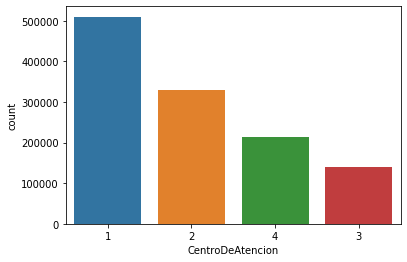

In [11]:
col = 'CentroDeAtencion'
sns.countplot(x=col, data=df, order=df[col].value_counts().index) 
plt.show()

Cantidad de Prestadores: 71


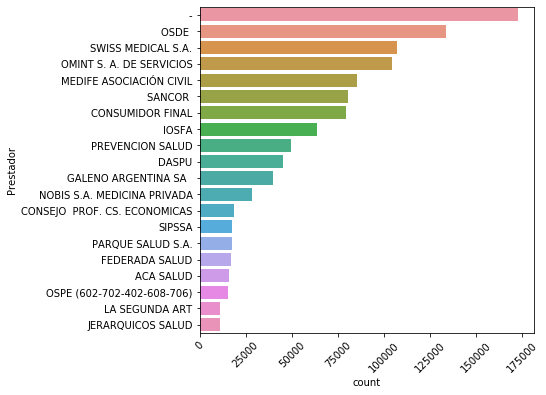

In [12]:
col = 'Prestador'
print('Cantidad de Prestadores:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax)
plt.xticks(rotation=45)
plt.show()

Cantidad de servicios: 105


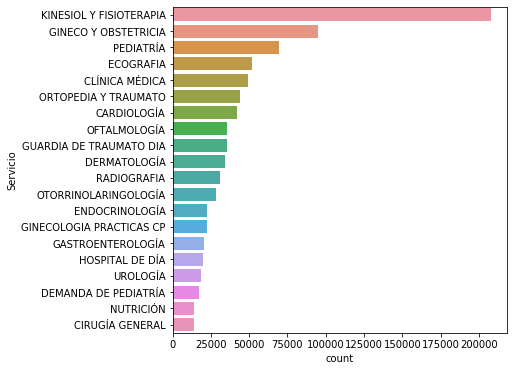

In [13]:
col = 'Servicio'
print('Cantidad de servicios:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax)
plt.show()

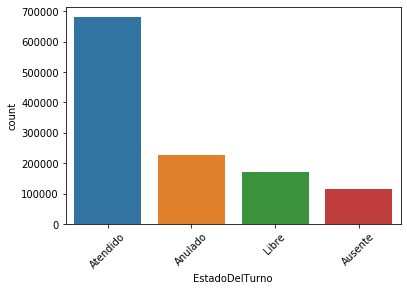

In [14]:
col = 'EstadoDelTurno'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.show()

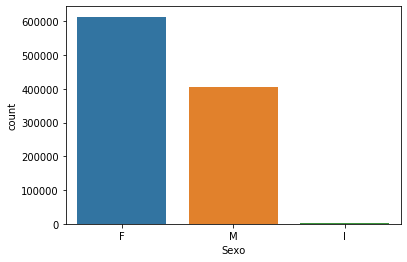

In [15]:
col = 'Sexo'
_df = df[~df.Paciente.isnull()]
sns.countplot(x=col, data=_df, order=_df[col].value_counts().index)
plt.show()

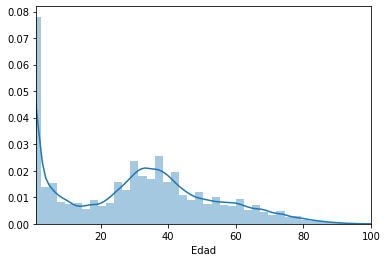

In [16]:
figsize=(10,6)
sns.distplot(df.Edad , kde=True)
plt.xlim(1,100)
plt.show()

Cantidad de prestaciones asignadas: 817


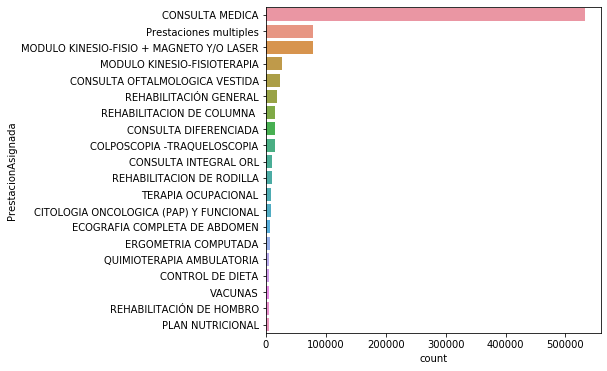

In [17]:
col = 'PrestacionAsignada'
print('Cantidad de prestaciones asignadas:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax)
plt.show()

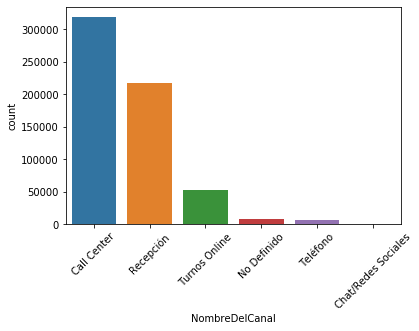

In [18]:
col = 'NombreDelCanal'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.show()

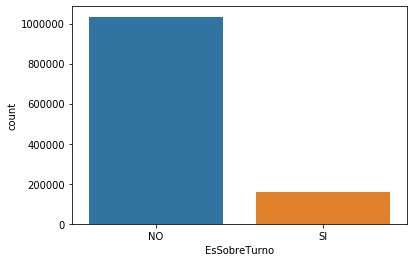

In [19]:
col = 'EsSobreTurno'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.show()

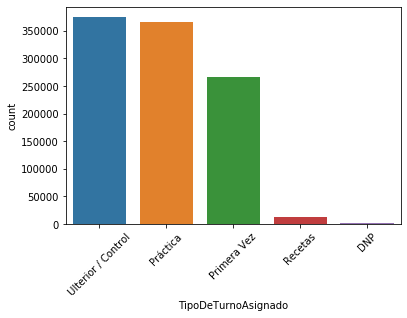

In [20]:
col = 'TipoDeTurnoAsignado'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.show()

#### **Análisis estadístico**

* Caracterizar a los pacientes de la institución en términos de edad, sexo y prestador. Para el caso de la edad, determinar si los datos siguen alguna alguna distribución conocida. Para el sexo, determinar si hay una diferencia significativa entre hombres y mujeres.

* Determinar la cantidad de turnos asignados por pacientes, y la cantidad de ausencias.

* **Observación:** El campo "Paciente" corresponde al nombre y apellido del paciente, por lo que no contamos con una identificación unívoca de cada persona, dado que los nombres se pueden repetir. ¿Es esto realmente un problema? ¿Se puede resolver?

* Elegir (al menos) tres variables, las cuales crean que pueden estar correlacionadas con la tasa de ausentismo. Para cada una de ellas calcular la probabilidad de que un turno esté ausente, condicionada a esa variable. 

* En el ámbito de la medicina es común ver que se utilizan descriptores estadísticos particulares. Uno de ellos es el Odds Ratio, el cual mide las chances de que los valores de dos variables sean observados en conjunto [1]. Para cada variable, calcular los Odds Ratio (OR) con respecto a la variable objetivo (austentismo), y determinar su intervalo de confianza utilizando el método que consideren adecuado.

* Comparar los resultdos de los dos puntos anteriores. Si existen diferencias, discutir cuáles son y a qué se deben.

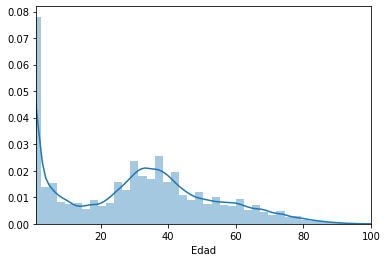

In [21]:
figsize=(10,6)
sns.distplot(df.Edad )
plt.xlim(1,100)
plt.show()

# En la variable Edad los datos siguen una distribución desconocida

# Calculamos intervalos de Edad

In [22]:
print (min(df.Edad),max(df.Edad))

0 120


In [23]:
df_intervalo_edad = pd.cut(df["Edad"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [24]:
pd.crosstab(df_intervalo_edad, df["Sexo"])

Sexo,F,I,M
Edad,,,
"(0, 10]",78408,158,88622
"(10, 20]",43867,85,39886
"(20, 30]",104988,184,53813
"(30, 40]",166086,523,76086
"(40, 50]",90162,64,57557
"(50, 60]",60477,73,38969
"(60, 70]",39860,32,31172
"(70, 80]",21152,31,14935
"(80, 90]",6972,6,4459


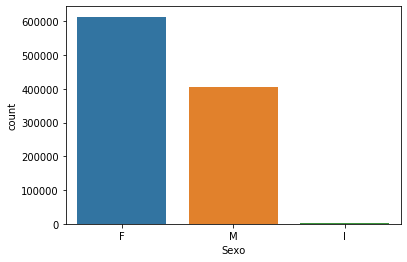

In [25]:
col = 'Sexo'
_df = df[~df.Paciente.isnull()]
sns.countplot(x=col, data=_df, order=_df[col].value_counts().index)
plt.show()

In [26]:
print (df["Sexo"].value_counts())
porcentaje = df["Sexo"].value_counts(normalize= True)
porcentaje100= df["Sexo"].value_counts(normalize= True).mul(100)
print (porcentaje)
print(porcentaje100)

F    613302
M    406548
     172837
I      1327
Name: Sexo, dtype: int64
F    0.513647
M    0.340488
     0.144753
I    0.001111
Name: Sexo, dtype: float64
F    51.364724
M    34.048847
     14.475291
I     0.111138
Name: Sexo, dtype: float64


## Sexo Mujeres 51% Hombres  34% (no tenemos en cuenta los otros dos valores de la variable que son indefinidos)

Cantidad de Prestadores: 71


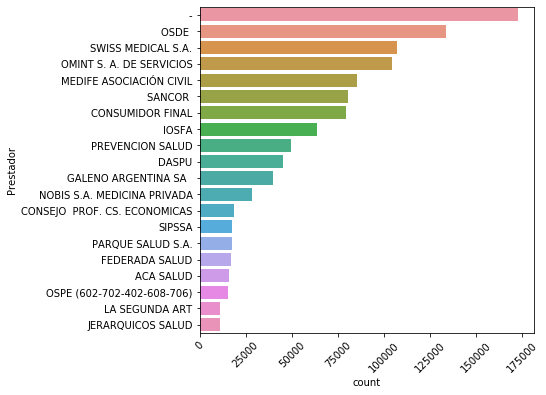

In [27]:
col = 'Prestador'
print('Cantidad de Prestadores:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax)
plt.xticks(rotation=45)
plt.show()

# Hay un gran número de entradas sin prestador

# Cantidad de turnos por paciente y cantidad de ausencias 

In [28]:
agregation = {'CantidadDeTurnos' : pd.NamedAgg(column ='Paciente', aggfunc='count')}
df_por_paciente = df.groupby ("Paciente").agg(**agregation)
df_por_paciente

,CantidadDeTurnos
Paciente,
0000bfc2a13c2b521f11ee15adb9b1bf,5
0000d0ca2375bde16d7b9bfc02dbf151,5
00016e74152f92212f7f3799eda62c57,41
0001ea3fd80ffed84ad7f8baff6f255e,3
000203f5a93e31088792913d275d8c42,4
...,...
fffe4ee972722123863ee4ed8e4dd9f1,8
fffedc69ec3f8ae618b49dbf99811cac,1
fffef9f05efac87c216d07357b832c07,17


In [29]:
df_por_paciente.describe()

,CantidadDeTurnos
count,123336.000000
mean,8.279634
std,14.788933
min,1.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,491.000000


(1, 600)

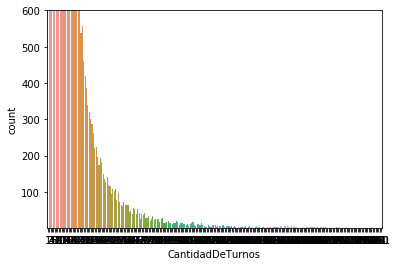

In [30]:
sns.countplot (data=df_por_paciente, x='CantidadDeTurnos' )
plt.ylim(1,600)

In [31]:
print ('Cantidad de pacientes por estado de turno')
print (df["EstadoDelTurno"].value_counts())
porcentaje = df["EstadoDelTurno"].value_counts(normalize= True)
porcentaje100= df["EstadoDelTurno"].value_counts(normalize= True).mul(100)
print ('Porcentaje de pacientes por estado de turno')
print(porcentaje100)

Cantidad de pacientes por estado de turno
Atendido    681421
Anulado     226287
Libre       172656
Ausente     113650
Name: EstadoDelTurno, dtype: int64
Porcentaje de pacientes por estado de turno
Atendido    57.069766
Anulado     18.951788
Libre       14.460132
Ausente      9.518314
Name: EstadoDelTurno, dtype: float64


# Cantidad de ausencias: 113650 porcentaje 9%

# Usando P(A|B)= P(A * B)/P(B)) 
# Usando P(A|B) = P(A)*P(B)
# Dos eventos son independientes si y solo si P(A*B)=P(A) * P(B)

##  Calculamos la probabilidad de que este ausente dado el sexo

In [32]:
p_ausente= len(df[df.EstadoDelTurno == "Ausente"])/len(df)
print ('Probabilidad de que este ausente' , p_ausente )

Probabilidad de que este ausente 0.09518313855616434


In [33]:
p_mujer = len(df[df.Sexo=="F"])/len(df)
print ('Probabilidad de que sea mujer' , p_mujer )

Probabilidad de que sea mujer 0.5136472436671596


In [34]:
p_ausente_and_mujer= p_mujer * p_ausente
print ('Probabilidad de que este ausente y mujer' , p_ausente_and_mujer)

Probabilidad de que este ausente y mujer 0.04889055676296316


In [35]:
count_ausente_and_mujer = len(df[(df.EstadoDelTurno == "Ausente") & (df.Sexo =="F")])
count_mujer = len(df[(df.Sexo =="F")])
print ('count_ausente_and_mujer', count_ausente_and_mujer)
print ('count_mujer', count_mujer)
p_ausente_dado_mujer = count_ausente_and_mujer / count_mujer
print ('Probabilidad de que este ausente y sea mujer' , p_ausente_dado_mujer )

count_ausente_and_mujer 71932
count_mujer 613302
Probabilidad de que este ausente y sea mujer 0.11728642658918445


# No se cumple que  P(A*B)=P(A) * P(B)  por lo que los eventos ausente y mujer son dependientes

In [36]:
p_hombre = len(df[df.Sexo=="M"])/len(df)
print ('Probabilidad de que sea hombre', p_hombre )

Probabilidad de que sea hombre 0.34048846998443905


In [37]:
p_ausente_and_hombre= p_hombre * p_ausente
print ('Probabilidad de que este ausente y sea hombre' , p_ausente_and_hombre )

Probabilidad de que este ausente y sea hombre 0.03240876121530526


In [38]:
count_ausente_and_hombre = len(df[(df.EstadoDelTurno == "Ausente") & (df.Sexo =="M")])
count_hombre = len(df[(df.Sexo =="M")])
p_ausente_dado_hombre = count_ausente_and_hombre /count_hombre
print ('Probabilidad de que este ausente y sea hombre', p_ausente_dado_hombre )

Probabilidad de que este ausente y sea hombre 0.10204207129293466


# No se cumple que  P(A*B)=P(A) * P(B)  por lo que los eventos ausente y hombre son dependientes

##  Calculamos la probabilidad de que este ausente y que el Centro de Atencion sea 1, 2, 3 y 4

In [39]:
p_centro1 = len(df[df.CentroDeAtencion==1])/len(df)
print ('Probabilidad de que se atienda en el Centro 1' , p_centro1)

Probabilidad de que se atienda en el Centro 1 0.4272085586936167


In [40]:
p_centro2 = len(df[df.CentroDeAtencion==2])/len(df)
print ('Probabilidad de que se atienda en el Centro2 ',  p_centro2 )

Probabilidad de que se atienda en el Centro2  0.2767186984407218


In [41]:
p_centro3 = len(df[df.CentroDeAtencion==3])/len(df)
print ('Probabilidad de que se atienda en el Centro 3 ', p_centro3 )

Probabilidad de que se atienda en el Centro 3  0.11650868415278212


In [42]:
p_centro4 = len(df[df.CentroDeAtencion==4])/len(df)
print ('Probabilidad de que se atienda en el Centro 4 ' , p_centro4 )

Probabilidad de que se atienda en el Centro 4  0.17956405871287942


In [43]:
p_ausente_and_c1 = p_centro1 * p_ausente
print ('Probabilidad de que este ausente dado que se atendio en el Centro 1' , p_ausente_and_c1)

Probabilidad de que este ausente dado que se atendio en el Centro 1 0.04066305143451378


In [44]:
p_ausente_and_c2 = p_centro2 * p_ausente
print ('Probabilidad de que este ausente dado que se atendio en el Centro 1' , p_ausente_and_c2)

Probabilidad de que este ausente dado que se atendio en el Centro 1 0.026338954214764676


In [45]:
p_ausente_and_c3 = p_centro3 * p_ausente
print ('Probabilidad de que este ausente dado que se atendio en el Centro 1' , p_ausente_and_c3)

Probabilidad de que este ausente dado que se atendio en el Centro 1 0.011089662226710649


In [46]:
p_ausente_and_c4 = p_centro4 * p_ausente
print ('Probabilidad de que este ausente dado que se atendio en el Centro 1' , p_ausente_and_c4)

Probabilidad de que este ausente dado que se atendio en el Centro 1 0.01709147068017523


In [47]:
count_ausente_and_c1 = len(df[(df.EstadoDelTurno == "Ausente") & (df.CentroDeAtencion ==1)])
count_c1 = len(df[(df.CentroDeAtencion ==1)])
p_ausente_and_c1 = count_ausente_and_c1 / count_c1
print ('Probabilidad de que se atienda en el Centro 1 y este ausente' , p_ausente_and_c1)

Probabilidad de que se atienda en el Centro 1 y este ausente 0.09315164097527313


##  Calculamos la probabilidad de que este ausente DADO que el Centro de Atencion es 1,2,3 ,4

In [48]:
count_ausente_and_c2 = len(df[(df.EstadoDelTurno == "Ausente") & (df.CentroDeAtencion ==2)])
count_c2 = len(df[(df.CentroDeAtencion ==2)])
p_ausente_dado_c2 = count_ausente_and_c2 / count_c2
print ('Probabilidad de que se atienda en el Centro 2 y este ausente', p_ausente_dado_c2 )

Probabilidad de que se atienda en el Centro 2 y este ausente 0.11211358147249142


In [49]:
count_ausente_and_c3 = len(df[(df.EstadoDelTurno == "Ausente") & (df.CentroDeAtencion ==3)])
count_c3 = len(df[(df.CentroDeAtencion ==3)])
p_ausente_dado_c3 = count_ausente_and_c3 / count_c3
print ('Probabilidad de que se atienda en el Centro 2 y este ausente', p_ausente_dado_c3 )

Probabilidad de que se atienda en el Centro 2 y este ausente 0.11765255583590319


In [50]:
count_ausente_and_c4 = len(df[(df.EstadoDelTurno == "Ausente") & (df.CentroDeAtencion ==4)])
count_c4 = len(df[(df.CentroDeAtencion ==4)])
p_ausente_dado_c4 = count_ausente_and_c4 / count_c4
print ('Probabilidad de que se atienda en el Centro 2 y este ausente', p_ausente_dado_c4 )

Probabilidad de que se atienda en el Centro 2 y este ausente 0.05934646132032351


# No se cumple que  P(A*B)=P(A) * P(B)  por lo que los eventos ausente y centro son dependientes

##  Calculamos la probabilidad de que este ausente y que el tipo de turno sea práctica, control, PV, Recetas o DNP

In [51]:
p_Turno_Practica = len(df[df.TipoDeTurnoAsignado == 'Práctica'])/len(df)
print ('Probabilidad de que el tipo de turno sea practica' , p_Turno_Practica)

Probabilidad de que el tipo de turno sea practica 0.3058238848120709


In [52]:
p_Turno_Control = len(df[df.TipoDeTurnoAsignado == 'Ulterior / Control'])/len(df)
print ('Probabilidad de que el tipo de turno sea Consulta' , p_Turno_Control)

Probabilidad de que el tipo de turno sea Consulta 0.31409933216863456


In [53]:
p_Turno_PV = len(df[df.TipoDeTurnoAsignado == 'Primera Vez'])/len(df)
print ('Probabilidad de que el tipo de turno sea Consulta' , p_Turno_PV)

Probabilidad de que el tipo de turno sea Consulta 0.22325115115903163


In [54]:
p_Turno_Recetas = len(df[df.TipoDeTurnoAsignado == 'Recetas'])/len(df)
print ('Probabilidad de que el tipo de turno sea Consulta' , p_Turno_Recetas)

Probabilidad de que el tipo de turno sea Consulta 0.010009095370741046


In [55]:
p_Turno_DNP = len(df[df.TipoDeTurnoAsignado == 'DNP'])/len(df)
print ('Probabilidad de que el tipo de turno sea Consulta' , p_Turno_DNP)

Probabilidad de que el tipo de turno sea Consulta 0.0020586023279459036


In [56]:
p_ausente_and_Practica = p_Turno_Practica * p_ausente
print ('Probabilidad de que este ausente y que el turno es Práctica' , p_ausente_and_Practica)

Probabilidad de que este ausente y que el turno es Práctica 0.029109277201851788


In [57]:
p_ausente_and_Control = p_Turno_Control * p_ausente
print ('Probabilidad de que este ausente y que el turno es Control' , p_ausente_and_Control)

Probabilidad de que este ausente y que el turno es Control 0.02989696025420583


In [58]:
p_ausente_and_PV = p_Turno_PV * p_ausente
print ('Probabilidad de que este ausente y que el turno es Primera Vez' , p_ausente_and_PV)

Probabilidad de que este ausente y que el turno es Primera Vez 0.021249745253593296


In [59]:
p_ausente_and_Recetas = p_Turno_Recetas * p_ausente
print ('Probabilidad de que este ausente y que el turno es Recetas' , p_ausente_and_Recetas)

Probabilidad de que este ausente y que el turno es Recetas 0.000952697111495108


In [60]:
p_ausente_and_DNP = p_Turno_DNP * p_ausente
print ('Probabilidad de que este ausente y que el turno es DNP' , p_ausente_and_DNP)

Probabilidad de que este ausente y que el turno es DNP 0.00019594423061291739


In [61]:
count_ausente_and_Practica = len(df[(df.EstadoDelTurno == "Ausente") & (df.TipoDeTurnoAsignado == 'Práctica')])
count_Practica = len(df[(df.TipoDeTurnoAsignado == 'Práctica')])
p_ausente_dado_Practica = count_ausente_and_Practica / count_Practica
print ('Probabilidad de que sea Turno de Practica dado ausente', p_ausente_dado_Practica )

Probabilidad de que sea Turno de Practica dado ausente 0.09054984417704118


In [62]:
count_ausente_and_Control = len(df[(df.EstadoDelTurno == "Ausente") & (df.TipoDeTurnoAsignado == 'Ulterior / Control')])
count_Control = len(df[(df.TipoDeTurnoAsignado == 'Ulterior / Control')])
p_ausente_dado_Control = count_ausente_and_Control / count_Control
print ('Probabilidad de que sea Turno de Control dado ausente', p_ausente_dado_Control )

Probabilidad de que sea Turno de Control dado ausente 0.10787944720415743


In [63]:
count_ausente_and_PV = len(df[(df.EstadoDelTurno == "Ausente") & (df.TipoDeTurnoAsignado == 'Primera Vez')])
count_PV = len(df[(df.TipoDeTurnoAsignado == 'Primera Vez')])
p_ausente_dado_PV = count_ausente_and_PV / count_PV
print ('Probabilidad de que sea Turno de Primera Vez dado ausente', p_ausente_dado_PV )

Probabilidad de que sea Turno de Primera Vez dado ausente 0.14876671731097482


In [64]:
count_ausente_and_Recetas = len(df[(df.EstadoDelTurno == "Ausente") & (df.TipoDeTurnoAsignado == 'Recetas')])
count_Recetas = len(df[(df.TipoDeTurnoAsignado == 'Recetas')])
p_ausente_dado_Recetas = count_ausente_and_Recetas / count_Recetas
print ('Probabilidad de que sea Turno de Recetas dado ausente', p_ausente_dado_Recetas )

Probabilidad de que sea Turno de Recetas dado ausente 0.018157476361810726


In [65]:
count_ausente_and_DNP = len(df[(df.EstadoDelTurno == "Ausente") & (df.TipoDeTurnoAsignado == 'DNP')])
count_DNP = len(df[(df.TipoDeTurnoAsignado == 'DNP')])
p_ausente_dado_DNP = count_ausente_and_DNP / count_DNP
print ('Probabilidad de que sea Turno de DNP dado ausente', p_ausente_dado_DNP )

Probabilidad de que sea Turno de DNP dado ausente 0.10292921074043938


# No se cumple que  P(A*B)=P(A) * P(B)  por lo que los eventos ausente y tipo de turno son dependientes

In [66]:
df_ausentes = df.EstadoDelTurno=='Ausente'
df_turnos_ausentes = df[df_ausentes]
df_turnos_ausentes

Campo,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado
11,4,OSDE,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-01-02 07:30:00,Ausente,761aed3dc99b8b49a6524c2d3128eef5,M,26,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Práctica
12,4,OSDE,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-01-02 07:30:00,Ausente,cb5d1b5b4619ab46f27349661b4f4e0d,F,47,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Práctica
13,4,OSDE,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-01-02 07:30:00,Ausente,cb5d1b5b4619ab46f27349661b4f4e0d,F,47,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Primera Vez
18,4,OSDE,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-01-02 07:30:00,Ausente,761aed3dc99b8b49a6524c2d3128eef5,M,26,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Primera Vez
43,4,OMINT S. A. DE SERVICIOS,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-01-02 07:50:00,Ausente,8e3ba838dc73c1964fa42a1f5409cb1e,F,54,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Práctica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193930,3,IOSFA,83f98d11eb2af7056115dade74548582,PEDIATRÍA,2019-12-30 19:40:00,Ausente,6b5545eeab525bdc763e7c1d8decb8bb,M,2,CONSULTA MEDICA,Recepción,NO,Primera Vez
1193959,4,OMINT S. A. DE SERVICIOS,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-12-30 19:50:00,Ausente,e7a498ea22f06c8f4da4381fa81ccfdb,M,45,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Práctica
1193977,4,SWISS MEDICAL S.A.,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-12-30 20:10:00,Ausente,952b65b1f259c1e5e8c5e9ce5527c66f,M,39,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Práctica
1193980,4,SANCOR,e5184981c23c4e3c6d880a49f7b6f11b,KINESIOL Y FISIOTERAPIA,2019-12-30 20:10:00,Ausente,deffa21adea1dbcbac39349b252b10c0,F,44,MODULO KINESIO-FISIO + MAGNETO Y/O LASER,NaN,NO,Práctica


In [67]:
df_no_ausentes = df.EstadoDelTurno == 'Atendido' 
df_turnos_no_ausen = df[df_no_ausentes]
df_turnos_no_ausent = df_turnos_no_ausen.Sexo != 'I'
df_turnos_no_ausent
df_turnos_no_ausentes = df_turnos_no_ausen[df_turnos_no_ausent]
df_turnos_no_ausentes

Campo,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado
0,1,GALENO ARGENTINA SA,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:30:00,Atendido,56d3024136fe26d28d1d981a95772919,M,3,Prestaciones multiples,NaN,SI,Primera Vez
1,1,OMINT S. A. DE SERVICIOS,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:33:00,Atendido,72964a1348c696e9440fc8946bfb7af4,M,9,Prestaciones multiples,NaN,SI,Primera Vez
2,1,OMINT S. A. DE SERVICIOS,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:36:00,Atendido,b495739eba3587f3f75062c9eb2aff06,F,53,Prestaciones multiples,NaN,SI,Primera Vez
3,1,SWISS MEDICAL S.A.,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 12:44:00,Atendido,b5979d35af8b90e295ab21b6f0aed90b,F,9,Prestaciones multiples,NaN,SI,Primera Vez
10,2,CONSUMIDOR FINAL,6c4c6137afc7a8ca68efaad08c5e7e0b,OFTALMOLOGÍA,2019-01-02 07:29:00,Atendido,4321a35c481726c3708bc9cd8cf6d13f,F,64,CONSULTA MEDICA,NaN,SI,Ulterior / Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194008,1,MEDIFE ASOCIACIÓN CIVIL,a2073c1d145a1b5fd133f927fbbd7913,RADIOGRAFIA,2019-12-30 23:30:00,Atendido,ccbc17f84dfea8b5aef3942dd229c8a3,M,38,Prestaciones multiples,NaN,SI,Práctica
1194010,1,OSDE,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:24:00,Atendido,15a7d517fa140ac76f9a7a79de343d81,M,44,ECOGRAFIA COMPLETA DE ABDOMEN,NaN,SI,Práctica
1194011,1,OMINT S. A. DE SERVICIOS,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:27:00,Atendido,2bd3a6fd81b29758aa12a13d210e6fdc,M,53,ECOGRAFIA DE PARTES BLANDAS,NaN,SI,Práctica
1194012,1,SANCOR,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 11:29:00,Atendido,d72ffdcc0121edd182da6a32578e4bb1,F,28,ECOGRAFIA TRANSVAGINAL,NaN,SI,Práctica


# Odds Ratio

In [68]:
import scipy.stats as stats

In [69]:
tabla_cruzada_s = pd.crosstab(df.EstadoDelTurno, df["Sexo"])
tabla_cruzada_s

Sexo,,F,I,M
EstadoDelTurno,,,,
Anulado,188,139082,331,86686
Atendido,0,402283,763,278375
Ausente,0,71932,233,41485
Libre,172649,5,0,2


In [70]:
del tabla_cruzada_s ['I']
tabla_cruzada_s

Sexo,,F,M
EstadoDelTurno,,,
Anulado,188,139082,86686
Atendido,0,402283,278375
Ausente,0,71932,41485
Libre,172649,5,2


In [71]:
del tabla_cruzada_s [' ']
tabla_cruzada_s

Sexo,F,M
EstadoDelTurno,,
Anulado,139082,86686
Atendido,402283,278375
Ausente,71932,41485
Libre,5,2


# Tomamos solamente los valores Femenino y Masculino para la variable sexo

In [72]:
aa=(df_ausentes & (df_turnos_ausentes.Sexo == 'F')).sum()
ab=df_turnos_ausentes.Sexo.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.Sexo =='F')).sum()
bb = df_turnos_no_ausentes.Sexo.count() - ba
print (aa,ab,ba,bb)
or_mujer, pvalue_mujer = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

71932 41718 402283 278375
OR = 1.1932 , pvalue = 0.00000


In [73]:
aa=(df_ausentes & (df_turnos_ausentes.Sexo == 'M')).sum()
ab=df_turnos_ausentes.Sexo.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.Sexo =='M')).sum()
bb = df_turnos_no_ausentes.Sexo.count() - ba
print (aa,ab,ba,bb)
or_hombre ,pvalue_hombre = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

41485 72165 278375 402283
OR = 0.8307 , pvalue = 0.00000


# Graficamos el heatmap para ver la relacion entre la variable sexo y la variable Estado del turno

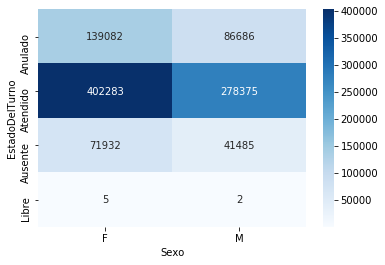

In [74]:
import seaborn
seaborn.heatmap(tabla_cruzada_s, annot = True, fmt ='g', cmap = 'Blues')

# Calculamos el odd ratio usando la libreria zepid

In [75]:
import zepid
# from zepid import odds_ratio
odr = zepid.calc.utils.odds_ratio(71932, 41485, 402283, 287375, alpha=0.05)
estimado = odr.point_estimate
minimo = odr.lower_bound
maximo = odr.upper_bound
error =odr.standard_error
alpha = odr.alpha
print ('Odd ratio' , estimado)
print ('valor mínimo ', minimo)
print ('valor maximo ',maximo)
print ('error' , error)
print ('alpha' , alpha)

Odd ratio 1.2386492535459266
valor mínimo  1.2226548211299904
valor maximo  1.2548529207057062
error 0.0066311916608397135
alpha 0.05


# Calculamos el odd ratio usando el método fisher exact 

In [76]:
oddsratio, pvalue = stats.fisher_exact([[71932, 41485], [402283, 287375]])
print ('oddsratio' , oddsratio)
print ('pvalue %5f' % pvalue)

oddsratio 1.2386492535459266
pvalue 0.000000


# Tambien lo calculamos usando el método wald

In [77]:
from scipy.stats import wald
resultado=wald.stats(tabla_cruzada_s)
intervalo= wald.interval(0.05,loc=0, scale=1)
# print(resultado)
print (intervalo)

(0.6393148180664407, 0.7146722312152641)


El valor del oddsratio 1.23 significa que es 1.23 veces de que las variables esten relacionadas con ser mujer u hombre

In [78]:
aa=(df_ausentes & (df_turnos_ausentes.CentroDeAtencion == 1)).sum()
ab=df_turnos_ausentes.CentroDeAtencion.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.CentroDeAtencion ==1)).sum()
bb = df_turnos_no_ausentes.CentroDeAtencion.count() - ba
print (aa,ab,ba,bb)
or_c1, pvalue_c1 = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

47516 66134 301007 379651
OR = 0.9062 , pvalue = 0.00000


In [79]:
aa=(df_ausentes & (df_turnos_ausentes.CentroDeAtencion == 2)).sum()
ab=df_turnos_ausentes.CentroDeAtencion.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.CentroDeAtencion ==2)).sum()
bb = df_turnos_no_ausentes.CentroDeAtencion.count() - ba
print (aa,ab,ba,bb)
or_c2, pvalue_c2 = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

37043 76607 196238 484420
OR = 1.1936 , pvalue = 0.00000


In [80]:
aa=(df_ausentes & (df_turnos_ausentes.CentroDeAtencion == 3)).sum()
ab=df_turnos_ausentes.CentroDeAtencion.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.CentroDeAtencion ==3)).sum()
bb = df_turnos_no_ausentes.CentroDeAtencion.count() - ba
print (aa,ab,ba,bb)
or_c3, pvalue_c3 = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

16367 97283 72901 607757
OR = 1.4026 , pvalue = 0.00000


In [81]:
aa=(df_ausentes & (df_turnos_ausentes.CentroDeAtencion == 4)).sum()
ab=df_turnos_ausentes.CentroDeAtencion.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.CentroDeAtencion ==4)).sum()
bb = df_turnos_no_ausentes.CentroDeAtencion.count() - ba
print (aa,ab,ba,bb)
or_c4, pvalue_c4 = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

12724 100926 110512 570146
OR = 0.6504 , pvalue = 0.00000


# Calculamos la tabla cruzada entre el estado del turno y el centro de atención

In [82]:
tabla_cruzada_c = pd.crosstab(df.EstadoDelTurno, df["CentroDeAtencion"])
tabla_cruzada_c

CentroDeAtencion,1,2,3,4
EstadoDelTurno,,,,
Anulado,76730,56095,23284,70178
Atendido,301259,196395,73060,110707
Ausente,47516,37043,16367,12724
Libre,84588,40873,26402,20793


# Graficamos el heatmap para ver la relacion entre la variable Centro de atención  y la variable Estado del turno

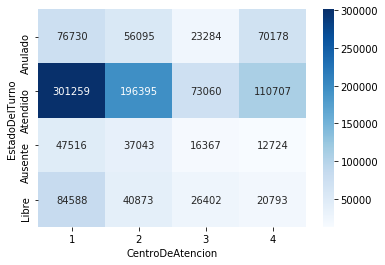

In [83]:
seaborn.heatmap(tabla_cruzada_c, annot = True, fmt ='g', cmap = 'Blues')

# También usamos el método de Chi cuadrado para el cálculo de la relación entre el centro de atención y el estado del turno

In [84]:
chi2_result,p_value,df_value,table_expected=stats.chi2_contingency(tabla_cruzada_c)
confidence_level = 0.95
crit_value = stats.chi2.ppf(q = confidence_level, df=df_value)
print()
print ('Tabla de Contingencia')
print ('====================================')
print ('chi2:', chi2_result)
print ('p-value= %.5f'% p_value)
print ('df = ', df_value)
print('Valor Crítico: ',crit_value)


Tabla de Contingencia
chi2: 41491.20186583334
p-value= 0.00000
df =  9
Valor Crítico:  16.918977604620448


# Calculamos la tabla cruzada entre el estado del turno y el tipo de turno asignado

In [85]:
tabla_cruzada_tt = pd.crosstab(df.EstadoDelTurno, df["TipoDeTurnoAsignado"])
tabla_cruzada_tt

TipoDeTurnoAsignado,DNP,Primera Vez,Práctica,Recetas,Ulterior / Control
EstadoDelTurno,,,,,
Anulado,286,50266,100969,633,73939
Atendido,1919,176643,231117,11101,260641
Ausente,253,39656,33065,217,40459
Libre,0,0,7,0,0


In [86]:
aa=(df_ausentes & (df_turnos_ausentes.TipoDeTurnoAsignado == 'Práctica')).sum()
ab=df_turnos_ausentes.TipoDeTurnoAsignado.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.TipoDeTurnoAsignado == 'Práctica')).sum()
bb = df_turnos_no_ausentes.TipoDeTurnoAsignado.count() - ba
print (aa,ab,ba,bb)
or_pra, pvalue_pra = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

33065 80585 230808 449850
OR = 0.7997 , pvalue = 0.00000


In [87]:
aa=(df_ausentes & (df_turnos_ausentes.TipoDeTurnoAsignado == 'DNP')).sum()
ab=df_turnos_ausentes.TipoDeTurnoAsignado.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.TipoDeTurnoAsignado == 'DNP')).sum()
bb = df_turnos_no_ausentes.TipoDeTurnoAsignado.count() - ba
print (aa,ab,ba,bb)
or_DNP, pvalue_DNP = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

253 113397 1918 678740
OR = 0.7895 , pvalue = 0.00033


In [88]:
aa=(df_ausentes & (df_turnos_ausentes.TipoDeTurnoAsignado == 'Primera Vez')).sum()
ab=df_turnos_ausentes.TipoDeTurnoAsignado.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.TipoDeTurnoAsignado == 'Primera Vez')).sum()
bb = df_turnos_no_ausentes.TipoDeTurnoAsignado.count() - ba
print (aa,ab,ba,bb)
or_PV, pvalue_PV = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

39656 73994 176379 504279
OR = 1.5323 , pvalue = 0.00000


In [89]:
aa=(df_ausentes & (df_turnos_ausentes.TipoDeTurnoAsignado == 'Recetas')).sum()
ab=df_turnos_ausentes.TipoDeTurnoAsignado.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.TipoDeTurnoAsignado == 'Recetas')).sum()
bb = df_turnos_no_ausentes.TipoDeTurnoAsignado.count() - ba
print (aa,ab,ba,bb)
or_recetas, pvalue_recetas = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

217 113433 11097 669561
OR = 0.1154 , pvalue = 0.00000


In [90]:
aa=(df_ausentes & (df_turnos_ausentes.TipoDeTurnoAsignado == 'Ulterior / Control')).sum()
ab=df_turnos_ausentes.TipoDeTurnoAsignado.count() - aa
ba =(df_no_ausentes & (df_turnos_no_ausentes.TipoDeTurnoAsignado == 'Ulterior / Control')).sum()
bb = df_turnos_no_ausentes.TipoDeTurnoAsignado.count() - ba
print (aa,ab,ba,bb)
or_control, pvalue_control = stats.fisher_exact([[aa , ab] , [ba, bb]])
print ('OR = %.4f , pvalue = %.5f' %stats.fisher_exact([[aa , ab] , [ba, bb]]))

40459 73191 260456 420202
OR = 0.8918 , pvalue = 0.00000


# Graficamos el heatmap para ver la relación entre el tipo de turno asignado y el estado del turno 

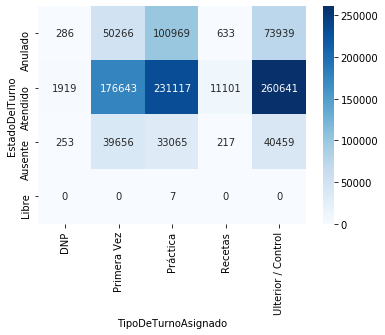

In [91]:
seaborn.heatmap(tabla_cruzada_tt,  annot = True, fmt ='g', cmap = 'Blues')

# Calculamos por el método de Chi cuadrado la relación entre el estado del turno y el tipo de turno asignado

In [92]:
chi2_result,p_value,df_value,table_expected=stats.chi2_contingency(tabla_cruzada_tt)
confidence_level = 0.95
crit_value = stats.chi2.ppf(q = confidence_level, df=df_value)
print()
print ('Tabla de Contingencia')
print ('====================================')
print ('chi2:', chi2_result)
print ('p-value= %.5f'% p_value)
print ('df = ', df_value)
print('Valor Crítico: ',crit_value)


Tabla de Contingencia
chi2: 17074.700454013142
p-value= 0.00000
df =  12
Valor Crítico:  21.02606981748307


# Comparamos la probabilidad condicional con el valor obtenido con el cálculo de los odds ratio

In [93]:
x= [p_ausente_and_mujer, p_ausente_and_hombre, p_ausente_and_c1, p_ausente_and_c2,p_ausente_and_c3,p_ausente_and_c4,p_ausente_and_Practica,p_ausente_and_Control, p_ausente_and_PV, p_ausente_and_Recetas,  p_ausente_and_DNP ]
y= [or_mujer, or_hombre, or_c1, or_c2, or_c3, or_c4, or_pra, or_PV, or_DNP, or_recetas, or_control]

0    float64
dtype: object


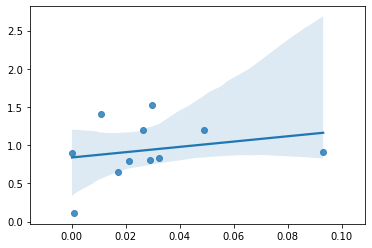

In [94]:
dfgrafico = pd.DataFrame(x,y)
print (dfgrafico.dtypes)
plt.figsize = (20,10)
sns.regplot (x,y)

# Observamos una ligera correlación entre los dos valores de probabilidad condicional y odds ratio

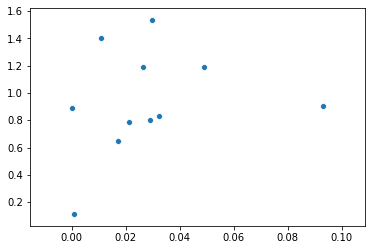

In [95]:
plt.figsize = (20,10)
sns.scatterplot(x,y)

# Cantidad de Turnos en el Tiempo

In [96]:
df['NewDate'] = [d.date() for d in df['FechaDelTurno']]
df['NewTime'] = [d.time() for d in df['FechaDelTurno']]

In [97]:
df.head()

Campo,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado,NewDate,NewTime
0,1,GALENO ARGENTINA SA,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:30:00,Atendido,56d3024136fe26d28d1d981a95772919,M,3,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,11:30:00
1,1,OMINT S. A. DE SERVICIOS,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:33:00,Atendido,72964a1348c696e9440fc8946bfb7af4,M,9,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,11:33:00
2,1,OMINT S. A. DE SERVICIOS,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:36:00,Atendido,b495739eba3587f3f75062c9eb2aff06,F,53,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,11:36:00
3,1,SWISS MEDICAL S.A.,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 12:44:00,Atendido,b5979d35af8b90e295ab21b6f0aed90b,F,9,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,12:44:00
4,1,MEDIFE ASOCIACIÓN CIVIL,a64579a4b9256db667343ebeb93c2588,GINECO Y OBSTETRICIA,2019-01-01 14:00:00,Anulado,4d0012ce65470b1c3c9ec7b67db41983,F,40,CONSULTA MEDICA,Turnos Online,NO,Ulterior / Control,2019-01-01,14:00:00


# Calculamos horarios mas demandados

In [98]:
print (min(df.NewTime),max(df.NewTime))
moda_NewTime = df.NewTime.mode()
print ('La moda del horario es',moda_NewTime)

00:00:00 23:58:00
La moda del horario es 0    10:00:00
dtype: object


# Vemos dia de la semana con mas turnos

In [99]:
df['DayOfWeek'] = df['FechaDelTurno'].apply(lambda time: time.dayofweek)
df['Month'] = df['FechaDelTurno'].apply(lambda time: time.month)
df['Day'] = df['DayOfWeek'].apply(lambda x: 'Lunes' if x == 0 else 'Martes' if x == 1
                                 else 'Miercoles' if x == 2 else 'Jueves' if x == 3
                                 else 'Viernes' if x== 4 else 'Sabado' if x == 5
                                 else 'Domingo' )
df['Hour'] = df['NewTime'].apply(lambda time: time.hour)

In [100]:
df

Campo,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado,NewDate,NewTime,DayOfWeek,Month,Day,Hour
0,1,GALENO ARGENTINA SA,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:30:00,Atendido,56d3024136fe26d28d1d981a95772919,M,3,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,11:30:00,1,1,Martes,11
1,1,OMINT S. A. DE SERVICIOS,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:33:00,Atendido,72964a1348c696e9440fc8946bfb7af4,M,9,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,11:33:00,1,1,Martes,11
2,1,OMINT S. A. DE SERVICIOS,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 11:36:00,Atendido,b495739eba3587f3f75062c9eb2aff06,F,53,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,11:36:00,1,1,Martes,11
3,1,SWISS MEDICAL S.A.,009da261083f00e160b4efa09761d9fa,CIRUGÍA PLÁSTICA INF,2019-01-01 12:44:00,Atendido,b5979d35af8b90e295ab21b6f0aed90b,F,9,Prestaciones multiples,NaN,SI,Primera Vez,2019-01-01,12:44:00,1,1,Martes,12
4,1,MEDIFE ASOCIACIÓN CIVIL,a64579a4b9256db667343ebeb93c2588,GINECO Y OBSTETRICIA,2019-01-01 14:00:00,Anulado,4d0012ce65470b1c3c9ec7b67db41983,F,40,CONSULTA MEDICA,Turnos Online,NO,Ulterior / Control,2019-01-01,14:00:00,1,1,Martes,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194009,2,-,fa089caaca143ad1ff284640fb4cd2d7,RESONANCIA,2019-12-30 23:30:00,Libre,NaN,,0,NaN,NaN,NO,NaN,2019-12-30,23:30:00,0,12,Lunes,23
1194010,1,OSDE,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:24:00,Atendido,15a7d517fa140ac76f9a7a79de343d81,M,44,ECOGRAFIA COMPLETA DE ABDOMEN,NaN,SI,Práctica,2019-12-31,09:24:00,1,12,Martes,9
1194011,1,OMINT S. A. DE SERVICIOS,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:27:00,Atendido,2bd3a6fd81b29758aa12a13d210e6fdc,M,53,ECOGRAFIA DE PARTES BLANDAS,NaN,SI,Práctica,2019-12-31,09:27:00,1,12,Martes,9
1194012,1,SANCOR,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 11:29:00,Atendido,d72ffdcc0121edd182da6a32578e4bb1,F,28,ECOGRAFIA TRANSVAGINAL,NaN,SI,Práctica,2019-12-31,11:29:00,1,12,Martes,11


In [101]:
agregation = {'Cantidad de Turnos' : pd.NamedAgg(column ='Day', aggfunc='count')}
df_turnos_por_dia = df.groupby ("Day").agg(**agregation)
df_turnos_por_dia

,Cantidad de Turnos
Day,
Domingo,684
Jueves,235331
Lunes,229107
Martes,242403
Miercoles,251095
Sabado,13290
Viernes,222104


In [102]:
df_cantidadT_por_dia = df.groupby ("Day") ['FechaDelTurno'].count()
df_cantidadT_por_dia

Day
Domingo         684
Jueves       235331
Lunes        229107
Martes       242403
Miercoles    251095
Sabado        13290
Viernes      222104
Name: FechaDelTurno, dtype: int64

# Cantidad de Turnos por dia de la semana

Text(0, 0.5, 'Cantidad de turnos')

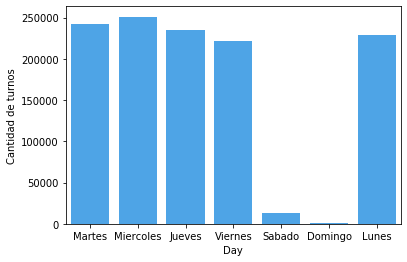

In [103]:
sns.countplot (data=df, x='Day' , color=BLUE)
plt.ylabel('Cantidad de turnos')

# Se observa que la cantidad de turnos de Lunes a Viernes es uniforme

In [104]:
df_ausentes = df.EstadoDelTurno=='Ausente'
df_turnos_ausentes = df[df_ausentes]
#df_turnos_ausentes

# Cantidad de turnos ausentes por dia de la semana

(0, 250000)

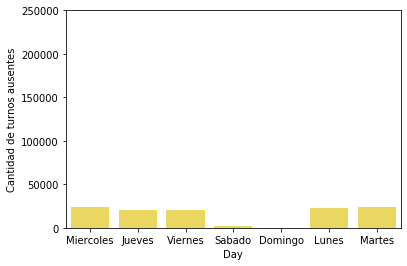

In [105]:
sns.countplot (data=df_turnos_ausentes, x='Day' , color =YELLOW)
plt.ylabel('Cantidad de turnos ausentes')
plt.ylim(0,250000)

# Se observa que la cantidad de turnos ausentes de Lunes a Viernes es uniforme

# Grafico comparativo de la media de turnos por dia de la semana y por hora

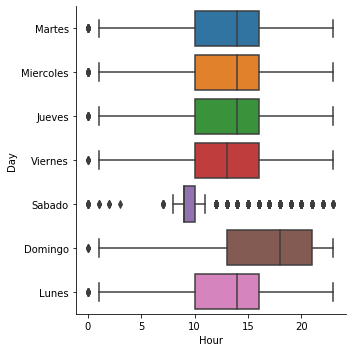

In [106]:
sns.catplot(x='Hour', y='Day' , data=df , kind='box')

# Se observa que la media de cantidad de turnos por dia hábil de la semana y por hora es uniforme

# Moda de la hora

In [107]:
moda=df['Hour'].mode()
print ('La Moda de la hora es',moda)

La Moda de la hora es 0    10
dtype: int64


# El horario mas demandado es 10 hs

# Relacion entre intervalo de edad y hora del turno

In [108]:
pd.crosstab(df_intervalo_edad, df["Hour"])

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Edad,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 10]",23,14,12,1,6,1,1,318,6912,15974,17922,16317,11636,8397,11633,18946,18878,18328,14552,6890,194,123,69,41
"(10, 20]",10,0,3,0,0,0,0,160,3464,6169,7210,6481,4632,4317,7579,11261,10825,9521,7479,3951,651,58,43,24
"(20, 30]",6,6,1,2,0,2,4,2081,11091,16107,16363,14888,10298,7665,12105,14619,15312,15399,13360,8022,1213,190,191,60
"(30, 40]",18,1,4,0,1,1,0,2909,19595,25152,23770,20132,14914,11980,18644,22586,23597,22984,20931,12888,1808,334,391,55
"(40, 50]",9,0,1,1,1,0,0,2934,13345,15539,14018,11808,9751,7812,11823,13467,14110,13658,11399,6426,1329,129,172,51
"(50, 60]",3,3,0,0,0,1,0,1862,8180,10266,9842,9256,7713,5944,8323,8925,9209,8588,6498,4015,663,76,118,34
"(60, 70]",0,1,0,0,0,1,0,964,6054,8675,9644,7966,5580,3933,5772,6008,5975,5119,3240,1605,396,65,57,9
"(70, 80]",3,0,1,0,0,0,0,392,2209,4368,4969,4448,2771,2108,3109,3809,3069,2522,1521,641,126,24,19,9
"(80, 90]",0,1,1,0,0,0,0,23,572,1413,1868,1459,991,626,871,1078,979,851,447,244,5,2,3,3


Text(0, 0.5, 'Cantidad de turnos')

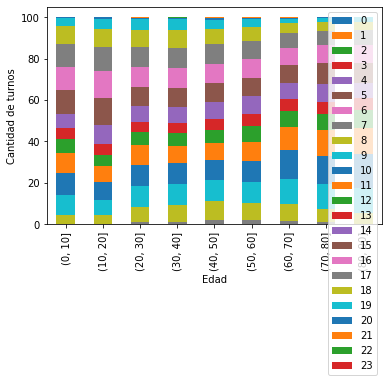

In [109]:
figsize=(15,10)
plot = pd.crosstab(df_intervalo_edad,df.Hour).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True)
plt.legend(loc='upper right')
plt.ylabel('Cantidad de turnos')

# Como evoluciona la cantidad de turnos y la cantidad de ausencias a lo largo del año ? Existe alguna tendencia ?

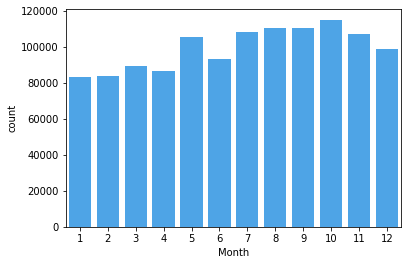

In [110]:
sns.countplot (data=df, x='Month' , color=BLUE)

(0, 120000)

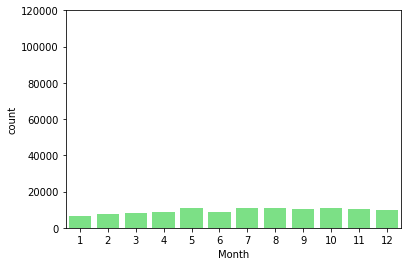

In [111]:
sns.countplot (data=df_turnos_ausentes, x='Month' , color=GREEN)
plt.ylim(0,120000)

# La cantidad de turnos y de ausencias a lo largo del año es uniforme

(1, 100)

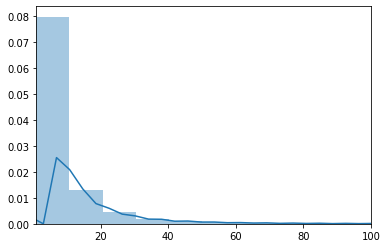

In [112]:
sns.distplot(df_por_paciente)
plt.xlim(1,100)


In [113]:
df_por_paciente

,CantidadDeTurnos
Paciente,
0000bfc2a13c2b521f11ee15adb9b1bf,5
0000d0ca2375bde16d7b9bfc02dbf151,5
00016e74152f92212f7f3799eda62c57,41
0001ea3fd80ffed84ad7f8baff6f255e,3
000203f5a93e31088792913d275d8c42,4
...,...
fffe4ee972722123863ee4ed8e4dd9f1,8
fffedc69ec3f8ae618b49dbf99811cac,1
fffef9f05efac87c216d07357b832c07,17


In [114]:
df_por_paciente.columns = ['Frec_abs']

In [115]:
df_por_paciente['Frec_rel'] = (100* df_por_paciente.Frec_abs)/len(df_por_paciente)

In [116]:
Frec_rel_val =df_por_paciente['Frec_rel'].values

In [117]:
acum = []

In [118]:
valor_acum =0

In [119]:
for i in Frec_rel_val :
    valor_acum = valor_acum + i
    acum.append(valor_acum)


In [120]:
df_por_paciente['Frec_rel_acum'] = acum

In [121]:
df_por_paciente

,Frec_abs,Frec_rel,Frec_rel_acum
Paciente,,,
0000bfc2a13c2b521f11ee15adb9b1bf,5,0.004054,0.004054
0000d0ca2375bde16d7b9bfc02dbf151,5,0.004054,0.008108
00016e74152f92212f7f3799eda62c57,41,0.033243,0.041350
0001ea3fd80ffed84ad7f8baff6f255e,3,0.002432,0.043783
000203f5a93e31088792913d275d8c42,4,0.003243,0.047026
...,...,...,...
fffe4ee972722123863ee4ed8e4dd9f1,8,0.006486,827.946423
fffedc69ec3f8ae618b49dbf99811cac,1,0.000811,827.947234
fffef9f05efac87c216d07357b832c07,17,0.013783,827.961017


# Se realiza este gráfico para tratar de demostrar la relación entre la cantidad de turnos y la frecuencia acumulada ya que no se puedo realizar el diagrama de pareto debido a la gran cantidad de filas de la tabla y la imposibilidad de dividirla en intervalos

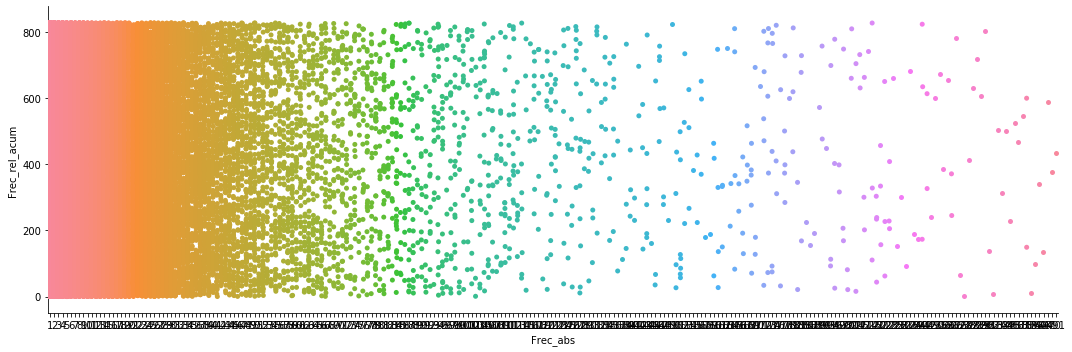

In [122]:
sns.catplot(x='Frec_abs', y='Frec_rel_acum', data = df_por_paciente, height = 5, aspect = 3)